In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

custom_colors = ['#0e1a50', '#067a72', '#c8eae8', '#eb0046', '#ffae80', '#0050ff', '#bad8fc']
cpalette = sns.color_palette(custom_colors)

In [193]:
df=pd.read_csv('Studentendaten.csv',delimiter=";")
termination_data=df.copy()
termination_data.head(5)

,StudiumID,StudentID,Studiumbeginn,Alter,Geschlecht,Studiengang,Leistungspunkte_zum_Abschluss,Kuendigungsdatum
0,31600509,31222461,07.05.2019,50.0,f,Bachelor International Management berufsbeglei...,90,06.05.2021
1,31679100,31258011,20.07.2019,30.0,f,Fernstudium Bachelor of Arts Public Relations,180,20.04.2021
2,31631508,31237821,25.05.2019,28.0,f,Fernstudium Bachelor of Arts Pflegemanagement,180,07.04.2021
3,31685331,31261038,01.08.2019,26.0,m,Fernstudium Bachelor of Arts Pflegepädagogik,120,07.04.2021
4,31655100,31018401,27.06.2019,27.0,f,Fernstudium Bachelor of Arts Physiotherapie,180,07.04.2021


In [194]:


total_rows = termination_data.shape[0]
non_null_rows = termination_data['Kuendigungsdatum'].notna().sum()
print(f"Total Rows: {total_rows}")
print(f"Rows with Data in 'Kuendigungsdatum': {non_null_rows}")


Total Rows: 7376
Rows with Data in 'Kuendigungsdatum': 2007


In [195]:

# Convert Kuendigungsdatum to datetime with error handling
termination_data['Kuendigungsdatum'] = pd.to_datetime(termination_data['Kuendigungsdatum'], format='%d.%m.%Y', errors='coerce')

# Drop rows where Kuendigungsdatum is NaT (Not a Time) due to invalid dates
termination_data = termination_data.dropna(subset=['Kuendigungsdatum'])

# Extract year and month from Kuendigungsdatum
termination_data['Year'] = termination_data['Kuendigungsdatum'].dt.year
termination_data['Month'] = termination_data['Kuendigungsdatum'].dt.month
termination_data=termination_data[termination_data['Year']>2000]
# Group by year and month, then count the occurrences
monthly_counts = termination_data.groupby(['Year', 'Month']).size().reset_index(name='Count').sort_values(['Year', 'Month'])


monthly_counts


,Year,Month,Count
0,2015,6,1
1,2017,2,2
2,2017,5,1
3,2017,6,1
4,2017,7,1
5,2017,8,1
6,2017,9,1
7,2017,10,1
8,2017,11,1
9,2017,12,1


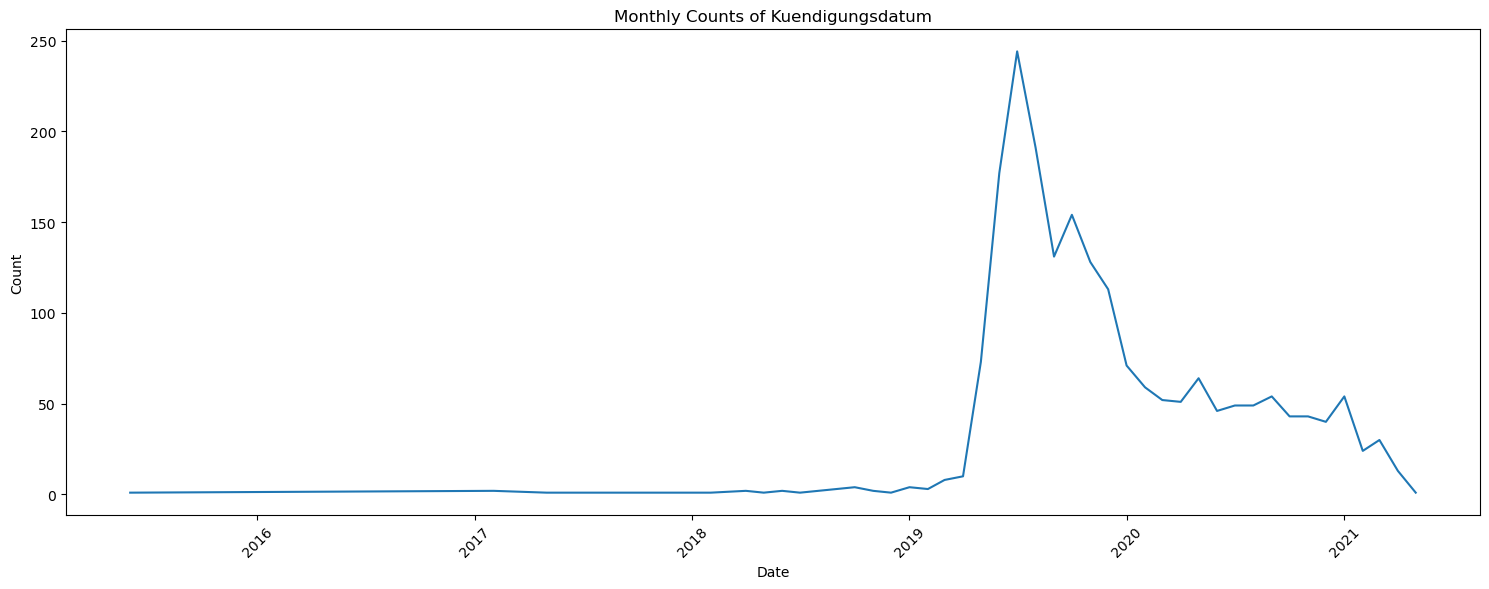

In [196]:

# Assuming the 'monthly_counts' DataFrame is already created as previously discussed

# Convert 'Year' and 'Month' back to a single datetime column for plotting
monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Count', data=monthly_counts)

# Enhancing the plot
plt.title('Monthly Counts of Kuendigungsdatum')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [197]:
termination_data=termination_data[termination_data['Kuendigungsdatum'].notna()]
termination_data.shape

(2005, 10)

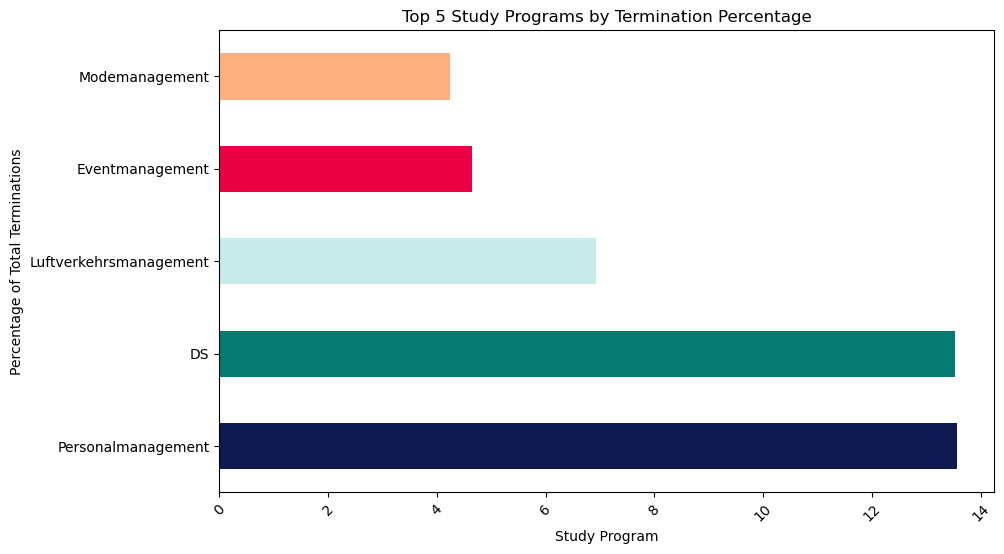

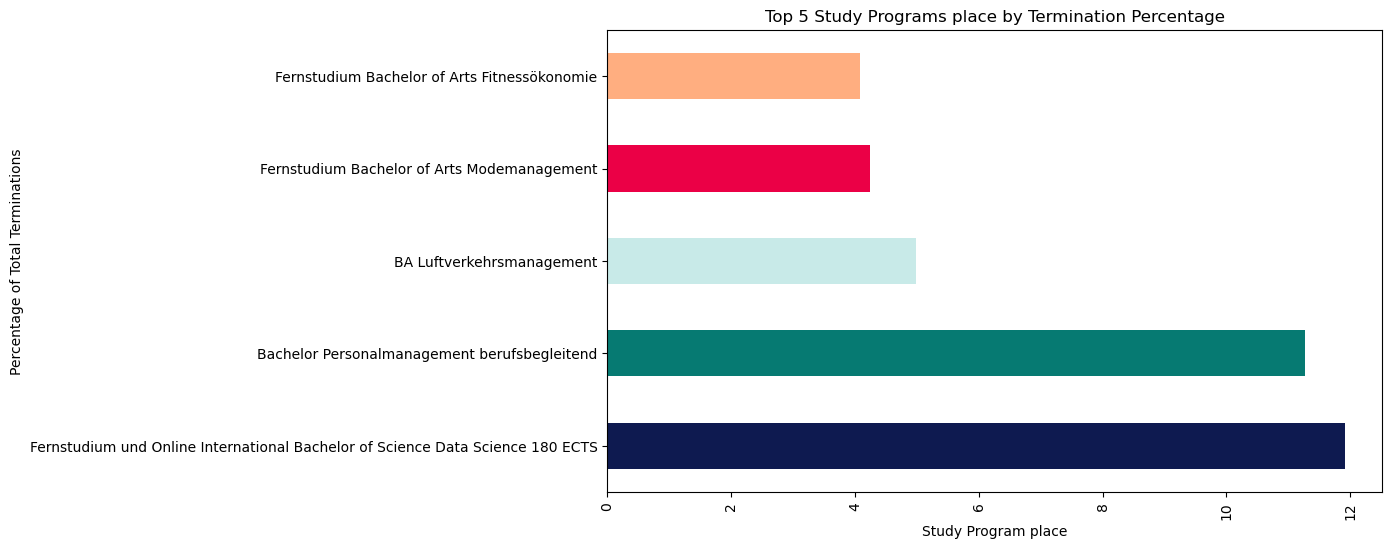

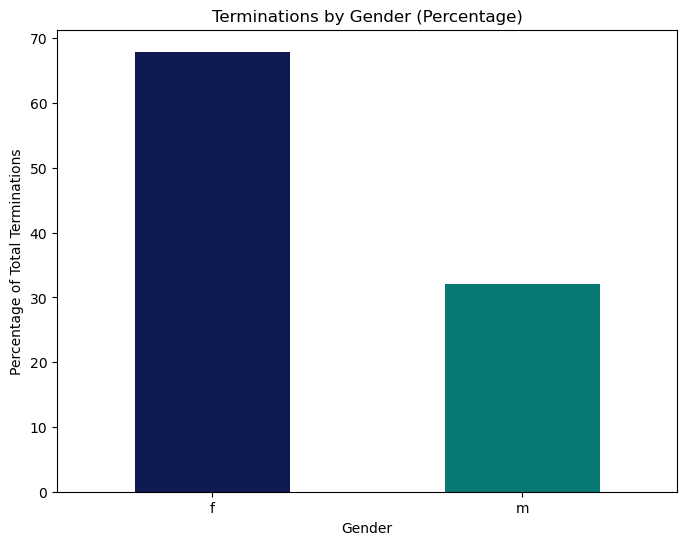

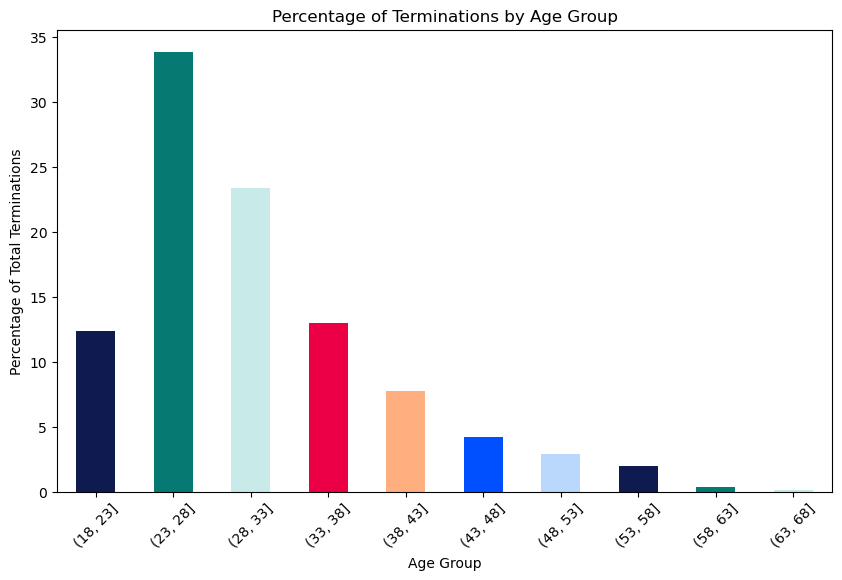

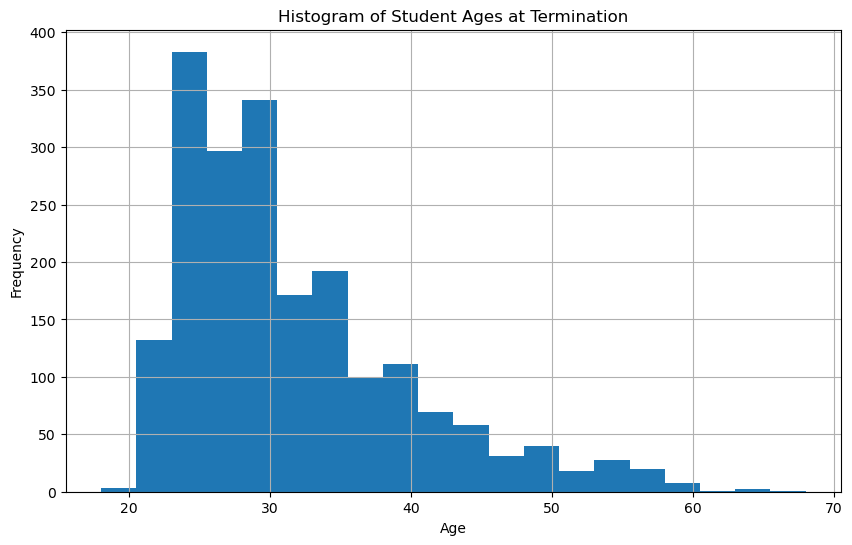

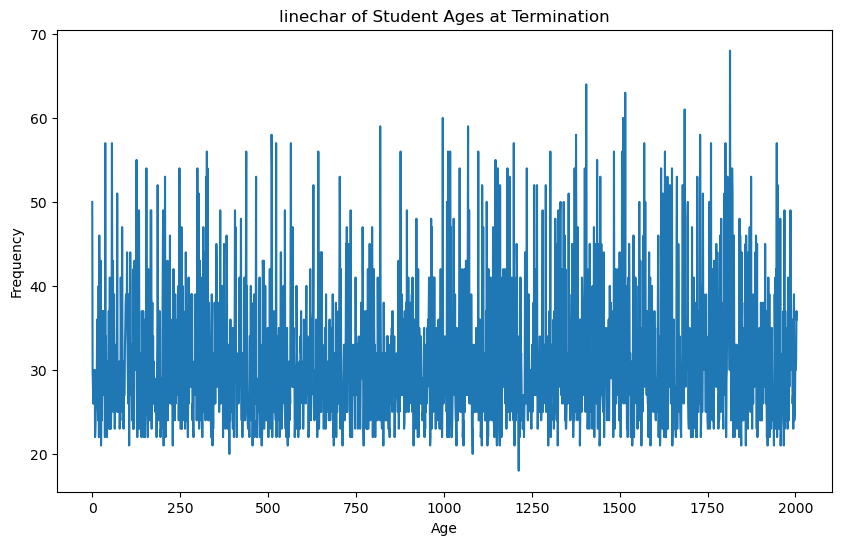

In [198]:


# Applying the function to create a new column with the extracted last word
termination_data['Field'] = termination_data['Studiengang'].apply(lambda x: x.split()[-2] if x.split()[-1] == 'berufsbegleitend'
                                      else ('DS' if x.split()[-1] == 'ECTS' and x.split()[-3] == 'Science' 
                                      else ' '.join(x.split()[-2:]) if x.split()[-1] == 'ECTS'
                                      else ' '.join(x.split()[-2:]) if x.split()[-1] == 'Management'
                                      else x.split()[-1]))

termination_data

# Calculate termination counts by study program
program_termination_counts = termination_data['Field'].value_counts()

# Convert counts to percentages
program_termination_percentages = program_termination_counts / program_termination_counts.sum() * 100

# Select top 5 programs by percentage
top_5_programs = program_termination_percentages.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_programs.plot(kind='barh', color=cpalette[:len(top_5_programs)])
plt.title('Top 5 Study Programs by Termination Percentage')
plt.ylabel('Percentage of Total Terminations')
plt.xlabel('Study Program')
plt.xticks(rotation=45)
plt.show()



# Calculate termination counts by study program
program_termination_counts = termination_data['Studiengang'].value_counts()

# Convert counts to percentages
program_termination_percentages = program_termination_counts / program_termination_counts.sum() * 100

# Select top 5 programs by percentage
top_5_programs = program_termination_percentages.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_programs.plot(kind='barh', color=cpalette[:len(top_5_programs)])
plt.title('Top 5 Study Programs place by Termination Percentage')
plt.ylabel('Percentage of Total Terminations')
plt.xlabel('Study Program place')
plt.xticks(rotation=90)
plt.show()


# Recalculating the gender counts and converting to percentages
gender_counts = termination_data['Geschlecht'].value_counts(normalize=True) * 100

# Cus
# Plotting Terminations by Gender as percentages
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=cpalette[:len(gender_counts)])
plt.title('Terminations by Gender (Percentage)')
plt.ylabel('Percentage of Total Terminations')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()


# Binning the ages
bins = range(int(termination_data['Alter'].min()), int(termination_data['Alter'].max()) + 5, 5)
age_groups = pd.cut(termination_data['Alter'], bins=bins)

# Calculating percentages
age_group_percentages = age_groups.value_counts(normalize=True) * 100
age_group_percentages.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
age_group_percentages.plot(kind='bar', color=cpalette[:len(age_group_percentages)])
plt.title('Percentage of Terminations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Total Terminations')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
termination_data['Alter'].hist(bins=20)
plt.title('Histogram of Student Ages at Termination')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(10, 6))
termination_data['Alter'].plot(kind='line')
plt.title('linechar of Student Ages at Termination')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


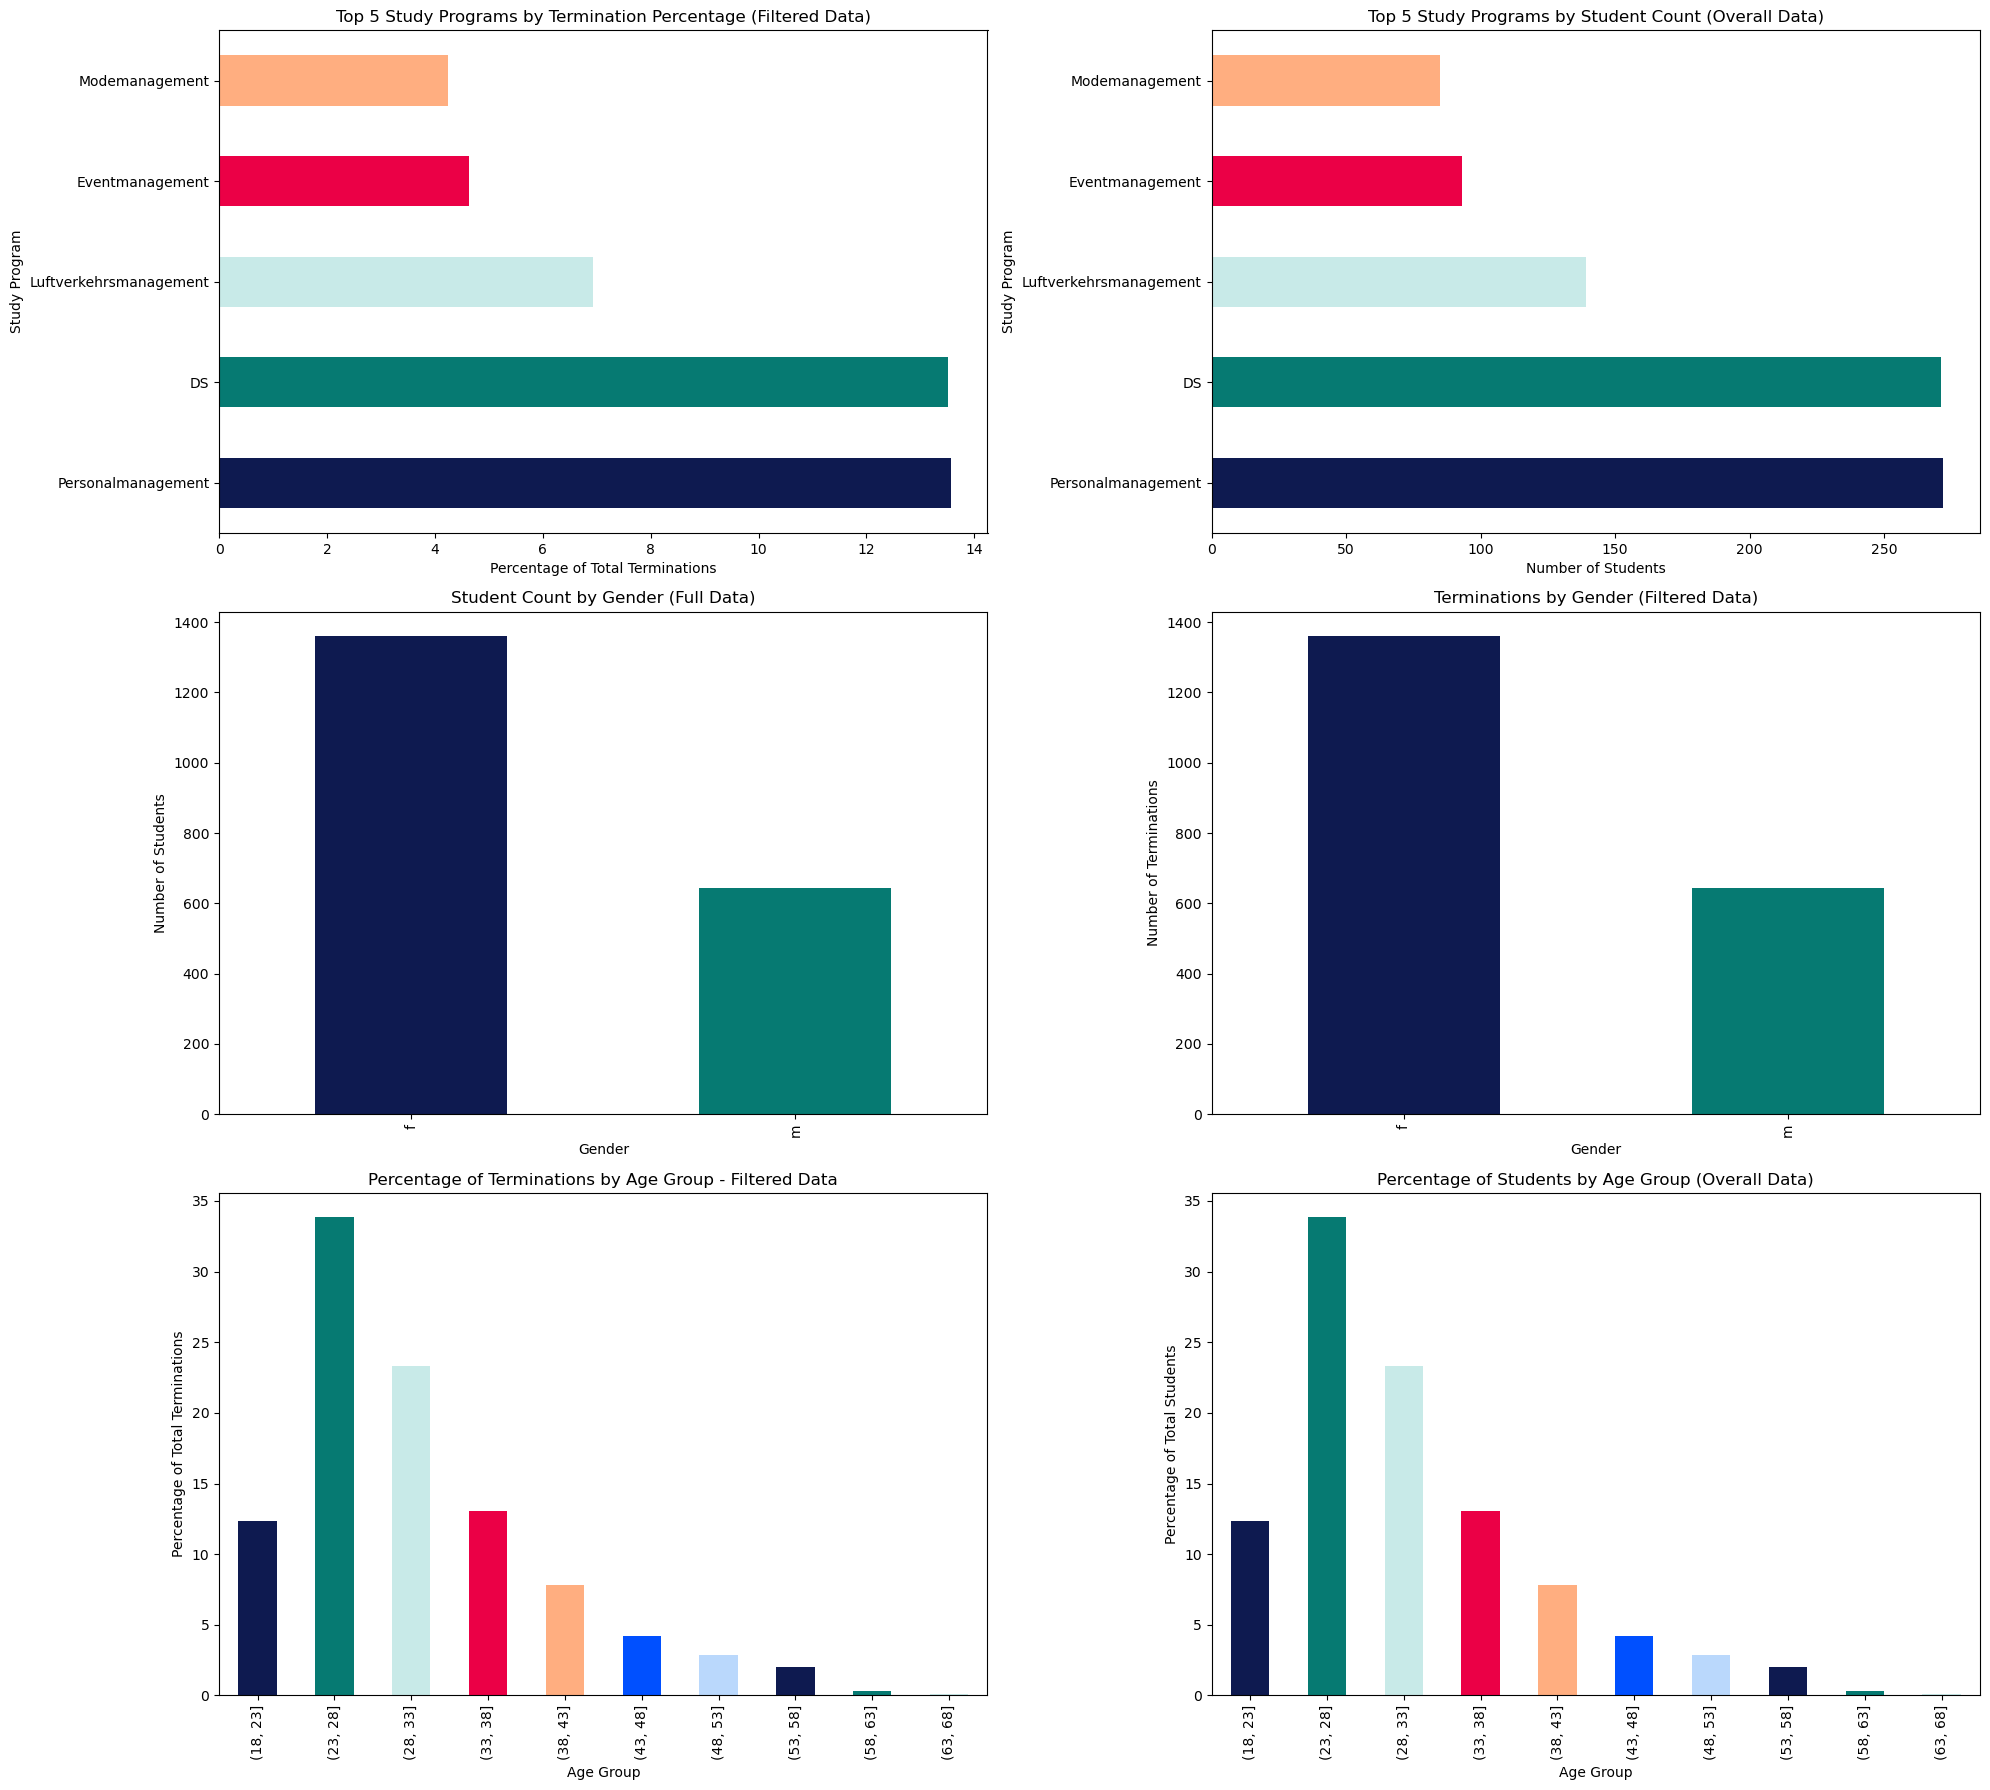

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming termination_data is your DataFrame

# Setting up the subplot environment
fig, axs = plt.subplots(3, 2, figsize=(20, 18))

# Plot 1: Top 5 Study Programs by Termination Percentage (Filtered Data)
program_termination_counts_filtered = filtered_termination_data['Field'].value_counts()
program_termination_percentages_filtered = program_termination_counts_filtered / program_termination_counts_filtered.sum() * 100
top_5_programs_filtered = program_termination_percentages_filtered.nlargest(5)
top_5_programs_filtered.plot(kind='barh', color=cpalette[:len(top_5_programs_filtered)], ax=axs[0, 0])
axs[0, 0].set_title('Top 5 Study Programs by Termination Percentage (Filtered Data)')
axs[0, 0].set_xlabel('Percentage of Total Terminations')
axs[0, 0].set_ylabel('Study Program')

# Plot 2: Top 5 Study Programs by Student Count (Overall Data)
program_student_counts_full = termination_data['Field'].value_counts()
top_5_programs_student_full = program_student_counts_full.nlargest(5)
top_5_programs_student_full.plot(kind='barh', color=cpalette[:len(top_5_programs_student_full)], ax=axs[0, 1])
axs[0, 1].set_title('Top 5 Study Programs by Student Count (Overall Data)')
axs[0, 1].set_xlabel('Number of Students')
axs[0, 1].set_ylabel('Study Program')

# Plot 3: Student Count by Gender (Full Data)
gender_counts_full = termination_data['Geschlecht'].value_counts()
gender_counts_full.plot(kind='bar', color=cpalette[:len(gender_counts_full)], ax=axs[1, 0])
axs[1, 0].set_title('Student Count by Gender (Full Data)')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Number of Students')

# Plot 4: Terminations by Gender (Filtered Data)
gender_counts_filtered = filtered_termination_data['Geschlecht'].value_counts()
gender_counts_filtered.plot(kind='bar', color=cpalette[:len(gender_counts_filtered)], ax=axs[1, 1])
axs[1, 1].set_title('Terminations by Gender (Filtered Data)')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Number of Terminations')

# Plot 5: Percentage of Terminations by Age Group (Filtered Data)
age_groups_filtered = pd.cut(filtered_termination_data['Alter'], bins=bins)
age_group_percentages_filtered = age_groups_filtered.value_counts(normalize=True) * 100
age_group_percentages_filtered.sort_index(inplace=True)
age_group_percentages_filtered.plot(kind='bar', color=cpalette[:len(age_group_percentages_filtered)], ax=axs[2, 0])
axs[2, 0].set_title('Percentage of Terminations by Age Group - Filtered Data')
axs[2, 0].set_xlabel('Age Group')
axs[2, 0].set_ylabel('Percentage of Total Terminations')

# Plot 6: Percentage of Students by Age Group (Overall Data)
bins = range(int(termination_data['Alter'].min()), int(termination_data['Alter'].max()) + 5, 5)
age_groups_full = pd.cut(termination_data['Alter'], bins=bins)
age_group_percentages_full = age_groups_full.value_counts(normalize=True) * 100
age_group_percentages_full.sort_index(inplace=True)
age_group_percentages_full.plot(kind='bar', color=cpalette[:len(age_group_percentages_full)], ax=axs[2, 1])
axs[2, 1].set_title('Percentage of Students by Age Group (Overall Data)')
axs[2, 1].set_xlabel('Age Group')
axs[2, 1].set_ylabel('Percentage of Total Students')


plt.tight_layout()
plt.show()


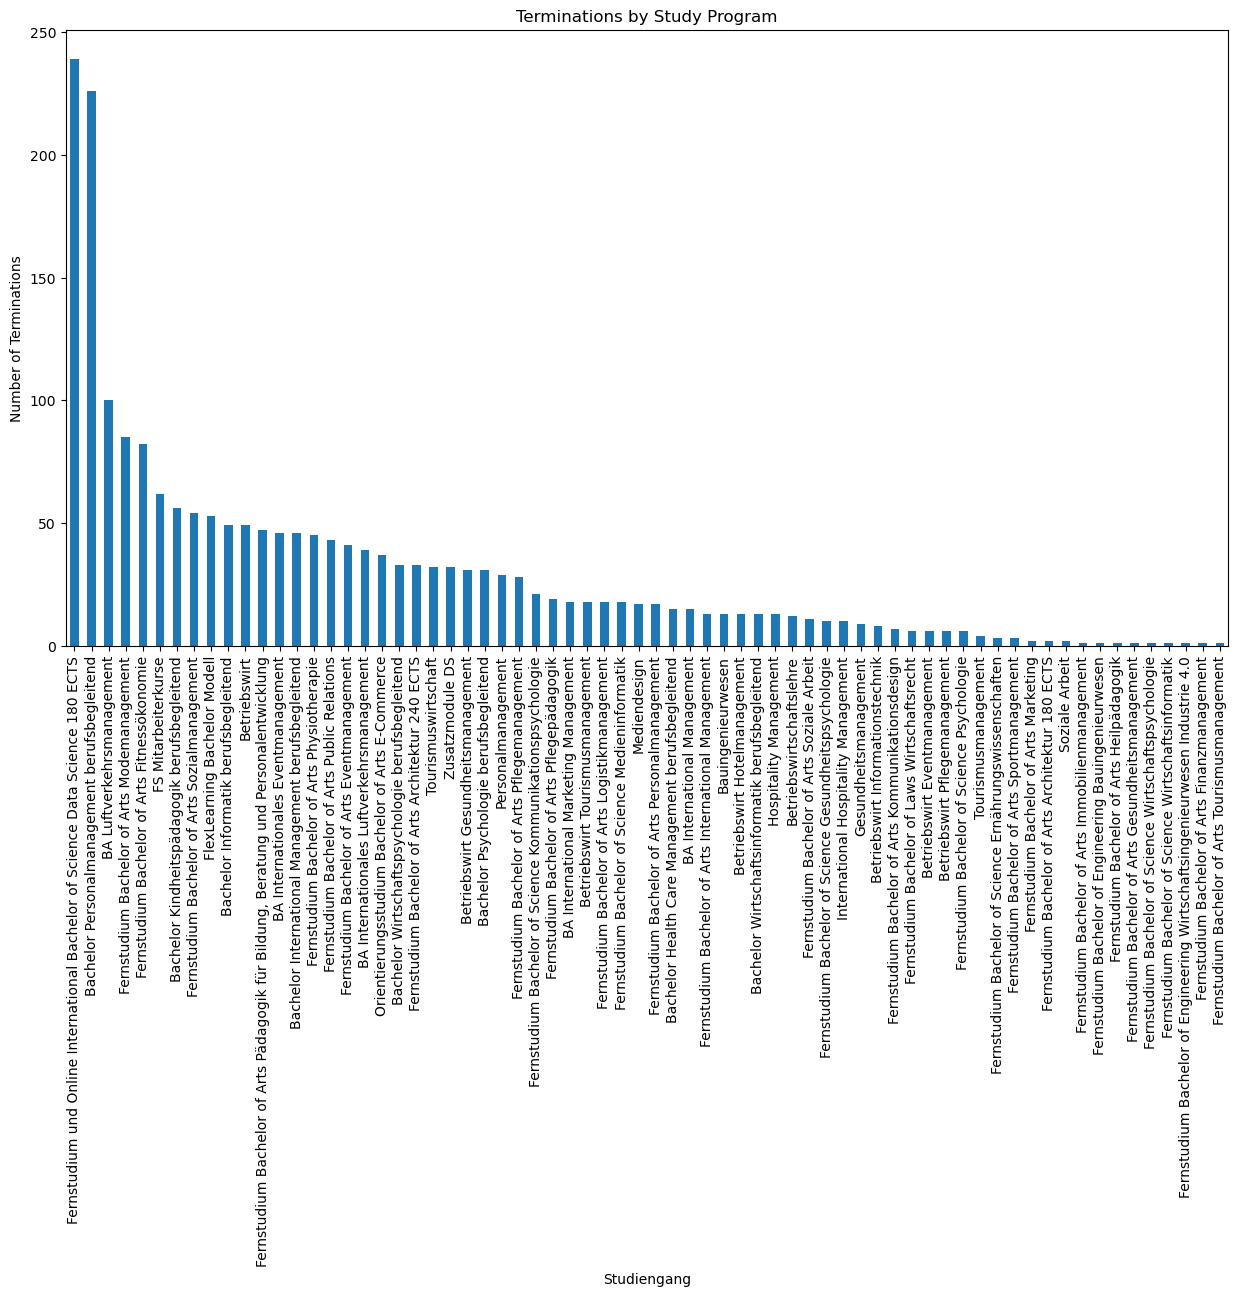

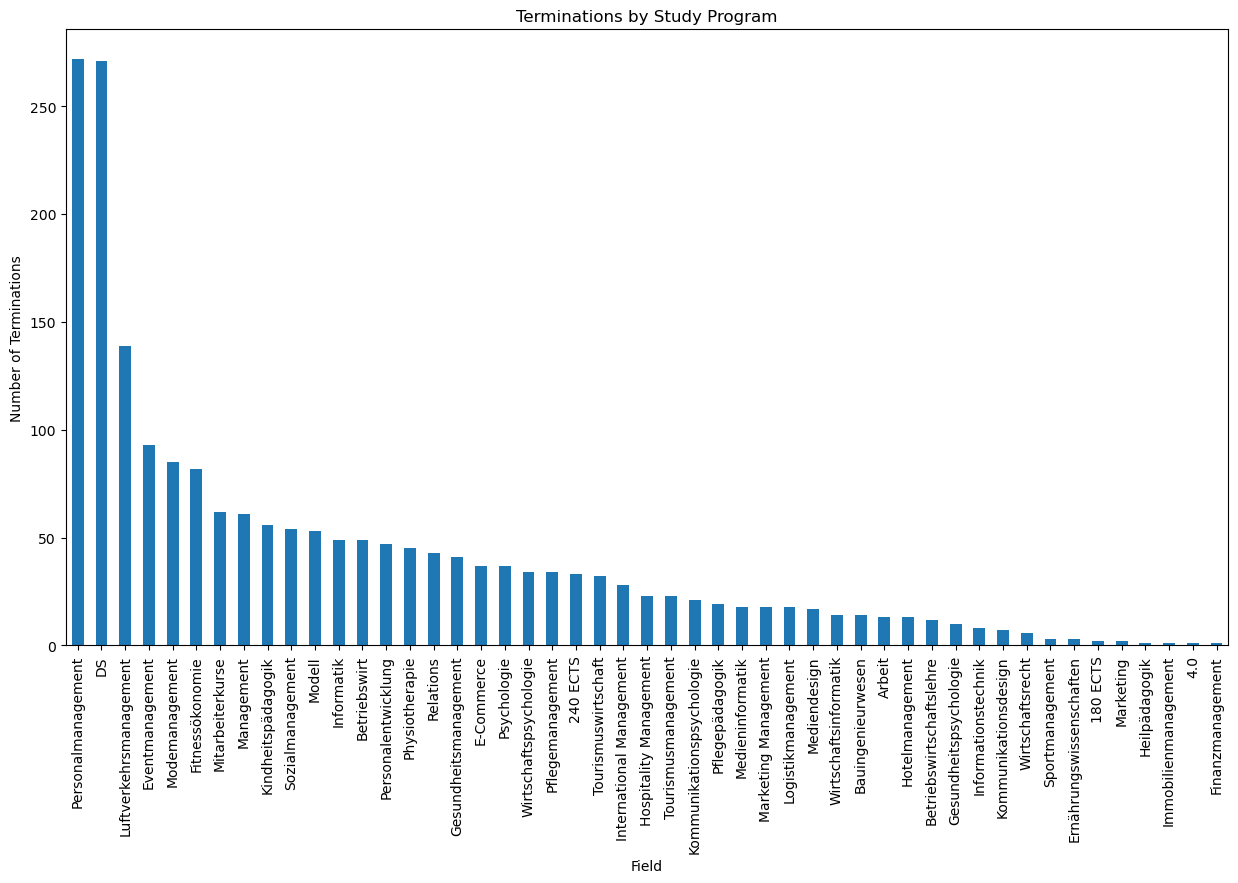

In [200]:
#nouse
program_termination_counts = termination_data['Studiengang'].value_counts()

plt.figure(figsize=(15, 8))
program_termination_counts.plot(kind='bar')
plt.title('Terminations by Study Program')
plt.ylabel('Number of Terminations')
plt.xticks(rotation=90)
plt.show()

#nouse
program_termination_counts = termination_data['Field'].value_counts()

plt.figure(figsize=(15, 8))
program_termination_counts.plot(kind='bar')
plt.title('Terminations by Study Program')
plt.ylabel('Number of Terminations')
plt.xticks(rotation=90)
plt.show()



In [201]:
# Loading the Email data
email_data = pd.read_csv('Emails.csv', delimiter=";")

# Loading the ECTS data
ects_data = pd.read_csv('Leistungspunkte (ECTS).csv', delimiter=";")

# Displaying the first few rows of each dataframe to understand their structure
email_data_head = email_data.head()
ects_data_head = ects_data.head()

email_data_head, ects_data_head


(   studentid  emaildatum  anzahl_emails
 0   31235835  25.03.2020              2
 1   31240521  12.12.2019              2
 2   31246749  03.04.2020              6
 3   31230093  03.04.2020              6
 4   31260822  19.04.2020              3,
    StudiumID  StudentID       Datum  ects_gathered
 0   31481934   31145961  01.08.2019             20
 1   31481934   31145961  17.10.2019              5
 2   31481949   31145967  24.11.2019              5
 3   31481949   31145967  22.12.2019              5
 4   31481949   31145967  29.12.2019              5)

In [202]:
import pandas as pd

# Load the data
email_data = pd.read_csv('Emails.csv', delimiter=";")
ects_data = pd.read_csv('Leistungspunkte (ECTS).csv', delimiter=";")
#termination_data = pd.read_csv('Studentendaten.csv', delimiter=";")

# Convert date columns to datetime
email_data['emaildatum'] = pd.to_datetime(email_data['emaildatum'])
termination_data['Kuendigungsdatum'] = pd.to_datetime(termination_data['Kuendigungsdatum'], format='%d.%m.%Y', errors='coerce')
termination_data['Studiumbeginn'] = pd.to_datetime(termination_data['Studiumbeginn'], format='%d.%m.%Y', errors='coerce')

# Aggregate email data
email_agg = email_data.groupby('studentid').agg({'emaildatum': ['min', 'max']}).reset_index()
email_agg.columns = ['StudentID', 'first_email_date', 'last_email_date']

# Merge the email data with the termination data
merged_data = pd.merge(termination_data, email_agg, on='StudentID', how='left')

# Create new columns for email counts
merged_data['mails_before_buying'] = merged_data.apply(
    lambda row: 1 if row['first_email_date'] < row['Studiumbeginn'] else 0, axis=1)
merged_data['mails_before_termination'] = merged_data.apply(
    lambda row: 1 if row['last_email_date'] < row['Kuendigungsdatum'] else 0, axis=1)
merged_data['mails_after_termination'] = merged_data.apply(
    lambda row: 1 if row['last_email_date'] > row['Kuendigungsdatum'] else 0, axis=1)

# Display the merged data with the new columns
merged_data.head()


/var/folders/3h/nyzvd6nj7rbb_1dxj_xv2w9w0000gn/T/ipykernel_14431/460367969.py:9: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  email_data['emaildatum'] = pd.to_datetime(email_data['emaildatum'])


,StudiumID,StudentID,Studiumbeginn,Alter,Geschlecht,Studiengang,Leistungspunkte_zum_Abschluss,Kuendigungsdatum,Year,Month,Field,first_email_date,last_email_date,mails_before_buying,mails_before_termination,mails_after_termination
0,31600509,31222461,2019-05-07,50.0,f,Bachelor International Management berufsbeglei...,90,2021-05-06,2021,5,Management,2020-03-04,2021-02-03,0,1,0
1,31679100,31258011,2019-07-20,30.0,f,Fernstudium Bachelor of Arts Public Relations,180,2021-04-20,2021,4,Relations,2019-08-06,2021-01-09,0,1,0
2,31631508,31237821,2019-05-25,28.0,f,Fernstudium Bachelor of Arts Pflegemanagement,180,2021-04-07,2021,4,Pflegemanagement,2019-07-26,2021-04-07,0,0,0
3,31685331,31261038,2019-08-01,26.0,m,Fernstudium Bachelor of Arts Pflegepädagogik,120,2021-04-07,2021,4,Pflegepädagogik,2019-09-25,2021-04-07,0,0,0
4,31655100,31018401,2019-06-27,27.0,f,Fernstudium Bachelor of Arts Physiotherapie,180,2021-04-07,2021,4,Physiotherapie,2019-08-09,2021-04-07,0,0,0


In [203]:

# Merge email data with termination data
merged_email_data = pd.merge(email_data, termination_data, left_on='studentid', right_on='StudentID', how='left')

# Calculate the email counts
email_counts = merged_email_data.groupby('studentid').apply(lambda df: pd.Series({
    'emails_before_buying': df[df['emaildatum'] < df['Studiumbeginn']]['anzahl_emails'].sum(),
    'emails_before_termination': df[df['emaildatum'] < df['Kuendigungsdatum']]['anzahl_emails'].sum(),
    'emails_after_termination': df[df['emaildatum'] > df['Kuendigungsdatum']]['anzahl_emails'].sum()
})).reset_index()

# Merge the email counts with the original termination data
final_merged_data = pd.merge(termination_data, email_counts, left_on='StudentID', right_on='studentid', how='left')

# Display the merged data with the new columns
final_merged_data.head()


,StudiumID,StudentID,Studiumbeginn,Alter,Geschlecht,Studiengang,Leistungspunkte_zum_Abschluss,Kuendigungsdatum,Year,Month,Field,studentid,emails_before_buying,emails_before_termination,emails_after_termination
0,31600509,31222461,2019-05-07,50.0,f,Bachelor International Management berufsbeglei...,90,2021-05-06,2021,5,Management,31222461.0,0.0,4.0,0.0
1,31679100,31258011,2019-07-20,30.0,f,Fernstudium Bachelor of Arts Public Relations,180,2021-04-20,2021,4,Relations,31258011.0,0.0,3.0,0.0
2,31631508,31237821,2019-05-25,28.0,f,Fernstudium Bachelor of Arts Pflegemanagement,180,2021-04-07,2021,4,Pflegemanagement,31237821.0,0.0,10.0,0.0
3,31685331,31261038,2019-08-01,26.0,m,Fernstudium Bachelor of Arts Pflegepädagogik,120,2021-04-07,2021,4,Pflegepädagogik,31261038.0,0.0,3.0,0.0
4,31655100,31018401,2019-06-27,27.0,f,Fernstudium Bachelor of Arts Physiotherapie,180,2021-04-07,2021,4,Physiotherapie,31018401.0,0.0,22.0,0.0


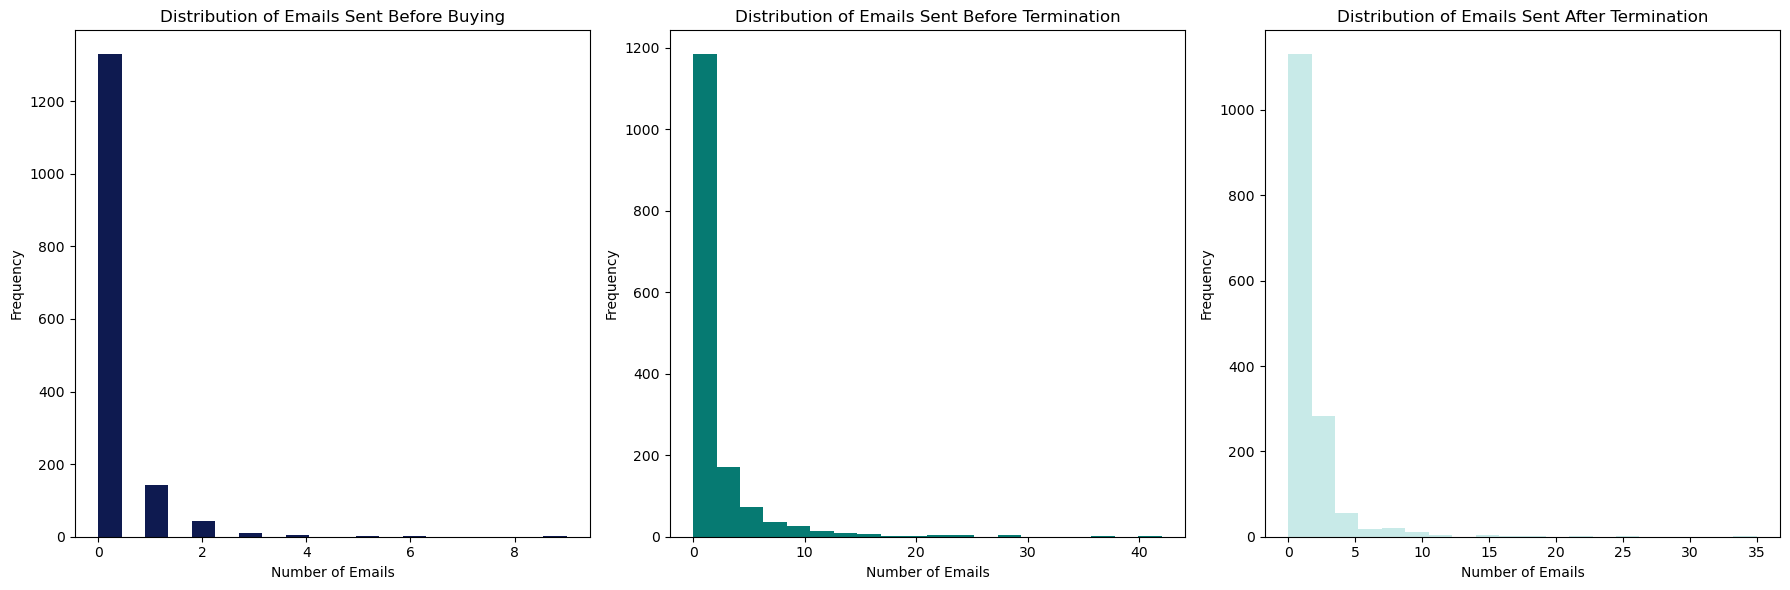

In [204]:
import matplotlib.pyplot as plt

# Custom color palette
cpalette = ['#0e1a50', '#067a72', '#c8eae8', '#eb0046', '#ffae80', '#0050ff', '#bad8fc']

# Assuming 'final_merged_data' is your DataFrame and it contains the new columns
plt.figure(figsize=(18, 6))

# Plot for emails_before_buying
plt.subplot(1, 3, 1)
plt.hist(final_merged_data['emails_before_buying'], bins=20, color=cpalette[0])
plt.title('Distribution of Emails Sent Before Buying')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')

# Plot for emails_before_termination
plt.subplot(1, 3, 2)
plt.hist(final_merged_data['emails_before_termination'], bins=20, color=cpalette[1])
plt.title('Distribution of Emails Sent Before Termination')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')

# Plot for emails_after_termination
plt.subplot(1, 3, 3)
plt.hist(final_merged_data['emails_after_termination'], bins=20, color=cpalette[2])
plt.title('Distribution of Emails Sent After Termination')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


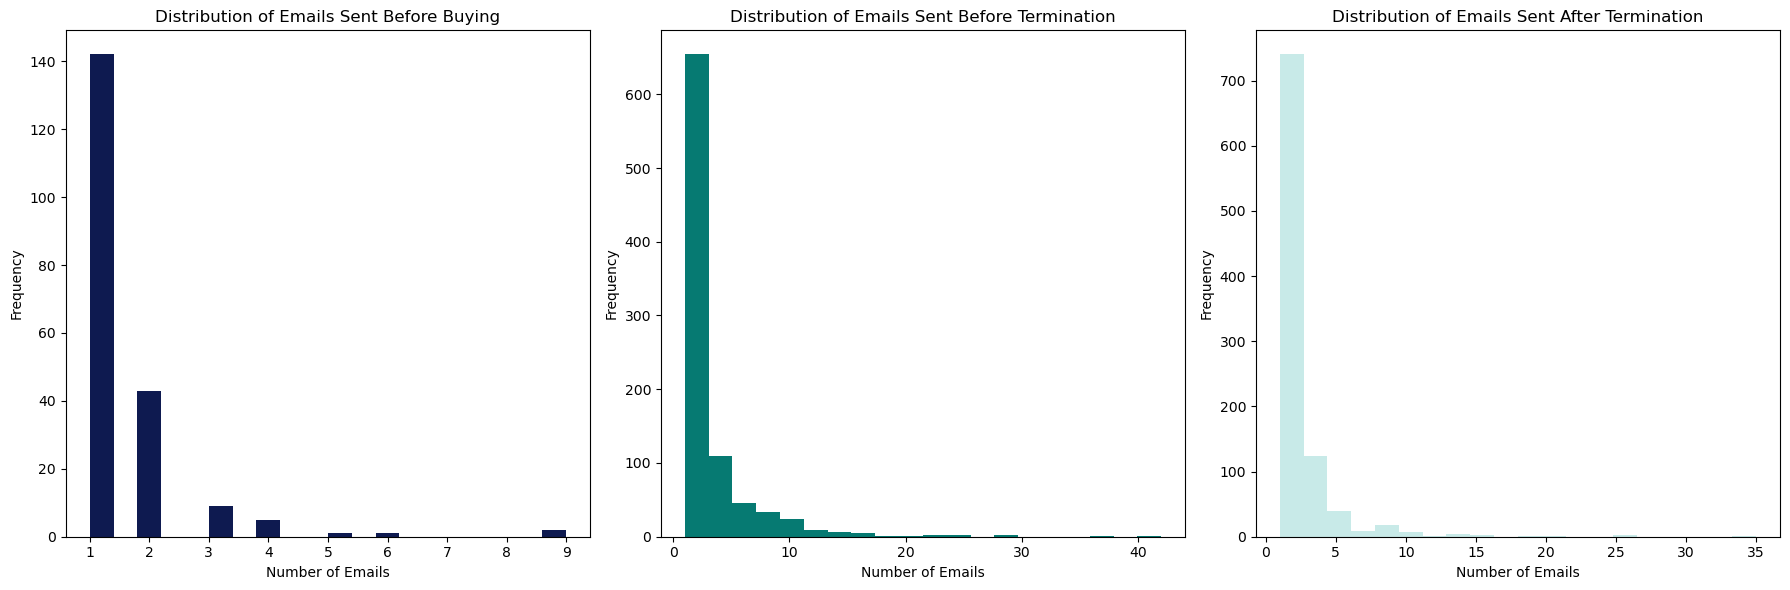

In [205]:
import matplotlib.pyplot as plt

# Custom color palette
cpalette = ['#0e1a50', '#067a72', '#c8eae8', '#eb0046', '#ffae80', '#0050ff', '#bad8fc']

# Assuming 'final_merged_data' is your DataFrame and it contains the new columns
plt.figure(figsize=(18, 6))

# Plot for emails_before_buying
plt.subplot(1, 3, 1)
plt.hist(final_merged_data['emails_before_buying'][final_merged_data['emails_before_buying'] !=0], bins=20, color=cpalette[0])
plt.title('Distribution of Emails Sent Before Buying')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')

# Plot for emails_before_termination
plt.subplot(1, 3, 2)
plt.hist(final_merged_data['emails_before_termination'][final_merged_data['emails_before_termination']!=0], bins=20, color=cpalette[1])
plt.title('Distribution of Emails Sent Before Termination')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')

# Plot for emails_after_termination
plt.subplot(1, 3, 3)
plt.hist(final_merged_data['emails_after_termination'][final_merged_data['emails_after_termination']!=0], bins=20, color=cpalette[2])
plt.title('Distribution of Emails Sent After Termination')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


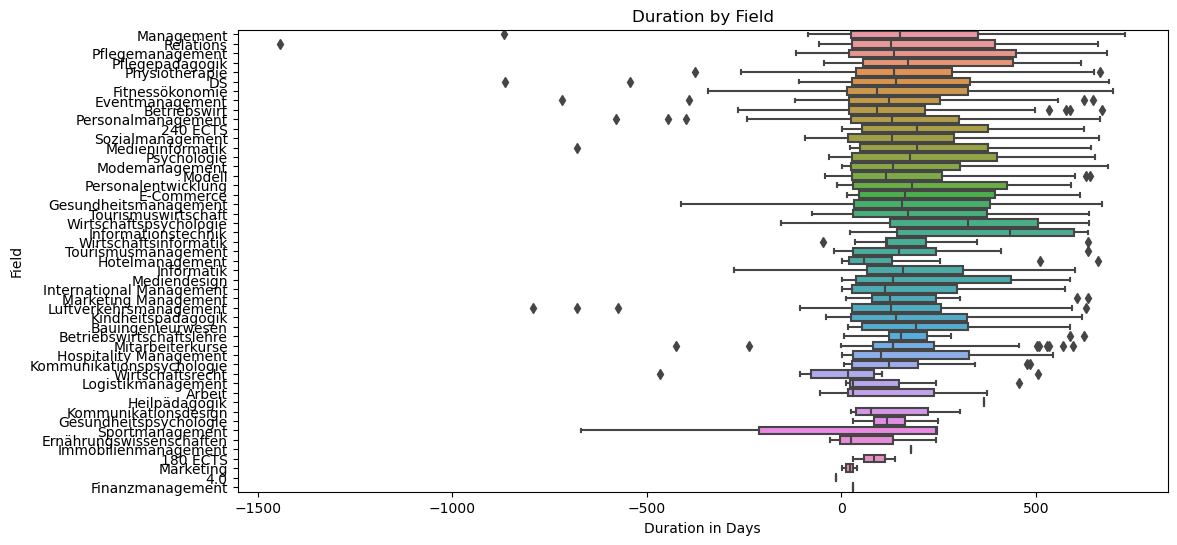

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming termination_data is your DataFrame
termination_data['Duration'] = termination_data['Kuendigungsdatum'] - termination_data['Studiumbeginn']
termination_data['Duration_in_days'] = termination_data['Duration'].dt.days

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(y='Field', x='Duration_in_days', data=termination_data)
plt.title('Duration by Field')
plt.ylabel('Field')
plt.xlabel('Duration in Days')
plt.show()


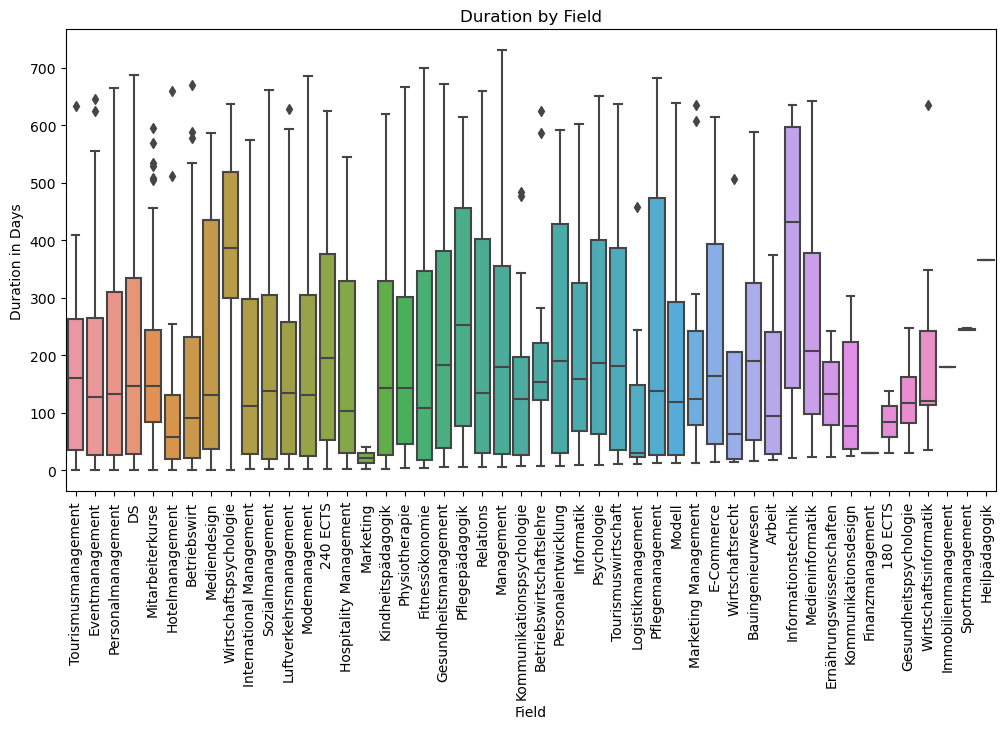

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming termination_data is your DataFrame
termination_data['Duration'] = termination_data['Kuendigungsdatum'] - termination_data['Studiumbeginn']
termination_data['Duration_in_days'] = termination_data['Duration'].dt.days

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Field', y='Duration_in_days', data=termination_data[termination_data['Duration_in_days']>=0].sort_values('Duration_in_days'))
plt.xticks(rotation=90)
plt.title('Duration by Field')
plt.xlabel('Field')
plt.ylabel('Duration in Days')
plt.show()


In [208]:
# termination date is earlier than actual start date 